In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=039c9a981a6b5f7d30ff176b5f1b62d3a197c9efd38257031a21d05155ba9a0e
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


**Aggregate functions**

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv('/content/sample_data/starbucks_drinkMenu_expanded.csv',header = True, inferSchema = True)
df.count()

242

In [ ]:
df.printSchema()

root
 |-- Beverage_category: string (nullable = true)
 |-- Beverage: string (nullable = true)
 |-- Beverage_prep: string (nullable = true)
 |-- Calories: integer (nullable = true)
 |--  Total Fat (g): string (nullable = true)
 |-- Trans Fat (g) : double (nullable = true)
 |-- Saturated Fat (g): double (nullable = true)
 |--  Sodium (mg): integer (nullable = true)
 |--  Total Carbohydrates (g) : integer (nullable = true)
 |-- Cholesterol (mg): integer (nullable = true)
 |--  Dietary Fibre (g): integer (nullable = true)
 |--  Sugars (g): integer (nullable = true)
 |--  Protein (g) : double (nullable = true)
 |-- Vitamin A (% DV) : string (nullable = true)
 |-- Vitamin C (% DV): string (nullable = true)
 |--  Calcium (% DV) : string (nullable = true)
 |-- Iron (% DV) : string (nullable = true)
 |-- Caffeine (mg): string (nullable = true)



In [ ]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [ ]:
df.select(numerical_cols).describe().toPandas()

,summary,Calories,Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g)
0,count,242,242,242,242,242,242
1,mean,193.87190082644628,6.363636363636363,128.88429752066116,35.99173553719008,0.8057851239669421,32.96280991735537
2,stddev,102.86330269432901,8.630256531577144,82.30322340154459,20.795186112178524,1.445944250382244,19.730199411944323
3,min,0,0,0,0,0,0
4,max,510,40,340,90,8,84


In [ ]:
df.select('Calories').describe().show()

+-------+------------------+
|summary|          Calories|
+-------+------------------+
|  count|               242|
|   mean|193.87190082644628|
| stddev|102.86330269432901|
|    min|                 0|
|    max|               510|
+-------+------------------+



In [ ]:
numerical_cols=[t[0] for t in df.dtypes if t[1]=='int']
numerical_cols

['Calories',
 ' Sodium (mg)',
 ' Total Carbohydrates (g) ',
 'Cholesterol (mg)',
 ' Dietary Fibre (g)',
 ' Sugars (g)']

In [ ]:
df.count(), df.drop_duplicates().count(), df.dropna().count()

(242, 242, 241)

In [ ]:
df.show()

+--------------------+--------------------+------------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+
|   Beverage_category|            Beverage|     Beverage_prep|Calories| Total Fat (g)|Trans Fat (g) |Saturated Fat (g)| Sodium (mg)| Total Carbohydrates (g) |Cholesterol (mg)| Dietary Fibre (g)| Sugars (g)| Protein (g) |Vitamin A (% DV) |Vitamin C (% DV)| Calcium (% DV) |Iron (% DV) |Caffeine (mg)|
+--------------------+--------------------+------------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+
|              Coffee|       Brewed Coffee|             Short|       3|           0.1|           0.0

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.regression import LinearRegression
from pyspark.sql.types import DoubleType

In [ ]:
df = df.withColumn("Calories", df["Calories"].cast(DoubleType()))
df = df.withColumn(" Total Fat (g) ", df[" Total Fat (g)"].cast(DoubleType()))
df = df.withColumn("Trans Fat (g) ", df["Trans Fat (g) "].cast(DoubleType()))
df = df.withColumn("Saturated Fat (g)", df["Saturated Fat (g)"].cast(DoubleType()))
df = df.withColumn(" Sodium (mg)", df[" Sodium (mg)"].cast(DoubleType()))
df = df.withColumn(" Total Carbohydrates (g) ",df[" Total Carbohydrates (g) "].cast(DoubleType()))
df = df.withColumn("Cholesterol (mg)", df["Cholesterol (mg)"].cast(DoubleType()))
df = df.withColumn(" Dietary Fibre (g)", df[" Dietary Fibre (g)"].cast(DoubleType()))
df = df.withColumn(" Sugars (g)", df[" Sugars (g)"].cast(DoubleType()))
df = df.withColumn(" Protein (g) ", df[" Protein (g) "].cast(DoubleType()))

In [ ]:
df.show()

+--------------------+--------------------+------------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+---------------+
|   Beverage_category|            Beverage|     Beverage_prep|Calories| Total Fat (g)|Trans Fat (g) |Saturated Fat (g)| Sodium (mg)| Total Carbohydrates (g) |Cholesterol (mg)| Dietary Fibre (g)| Sugars (g)| Protein (g) |Vitamin A (% DV) |Vitamin C (% DV)| Calcium (% DV) |Iron (% DV) |Caffeine (mg)| Total Fat (g) |
+--------------------+--------------------+------------------+--------+--------------+--------------+-----------------+------------+-------------------------+----------------+------------------+-----------+-------------+-----------------+----------------+----------------+------------+-------------+---------------+
|              Coffee|       Brewed Coffee|         

In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml import Pipeline

In [ ]:
df = df.na.drop()

In [ ]:
df.printSchema()

root
 |-- Beverage_category: string (nullable = true)
 |-- Beverage: string (nullable = true)
 |-- Beverage_prep: string (nullable = true)
 |-- Calories: double (nullable = true)
 |--  Total Fat (g): string (nullable = true)
 |-- Trans Fat (g) : double (nullable = true)
 |-- Saturated Fat (g): double (nullable = true)
 |--  Sodium (mg): double (nullable = true)
 |--  Total Carbohydrates (g) : double (nullable = true)
 |-- Cholesterol (mg): double (nullable = true)
 |--  Dietary Fibre (g): double (nullable = true)
 |--  Sugars (g): double (nullable = true)
 |--  Protein (g) : double (nullable = true)
 |-- Vitamin A (% DV) : string (nullable = true)
 |-- Vitamin C (% DV): string (nullable = true)
 |--  Calcium (% DV) : string (nullable = true)
 |-- Iron (% DV) : string (nullable = true)
 |-- Caffeine (mg): string (nullable = true)
 |--  Total Fat (g) : double (nullable = true)



In [ ]:
categoricalColumns = ['Calories']

In [ ]:
stages = []
cols = df.columns
for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]

numericCols = ['Calories', ' Total Fat (g) ', 'Trans Fat (g) ','Saturated Fat (g)',
               ' Sodium (mg)',' Total Carbohydrates (g) ','Cholesterol (mg)',' Dietary Fibre (g)', ' Sugars (g)',' Protein (g) ']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

selectedCols = ['Calories', 'features']
df = df.select(selectedCols)
df.printSchema()


root
 |-- Calories: double (nullable = true)
 |-- features: vector (nullable = true)



In [ ]:
(train, test) = df.randomSplit([0.7, 0.3], seed=2018)
print("Training dataset count:", train.count())
print("Test dataset count:", test.count())

Training dataset count: 166
Test dataset count: 74


**Linear regression model**

+------------------+--------+--------------------+
|        prediction|Calories|            features|
+------------------+--------+--------------------+
|3.5845686972728004|     0.0|     (57,[22],[1.0])|
| 8.064995799852042|     5.0|(57,[26,47,52,53,...|
|14.430624723680111|    10.0|(57,[30,47,52,53,...|
|  44.2747575693662|    15.0|(57,[38,47,52,53,...|
|  62.5535461920137|    60.0|(57,[27,47,48,49,...|
+------------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 15.3129
R2 on test data: 0.977985263509472


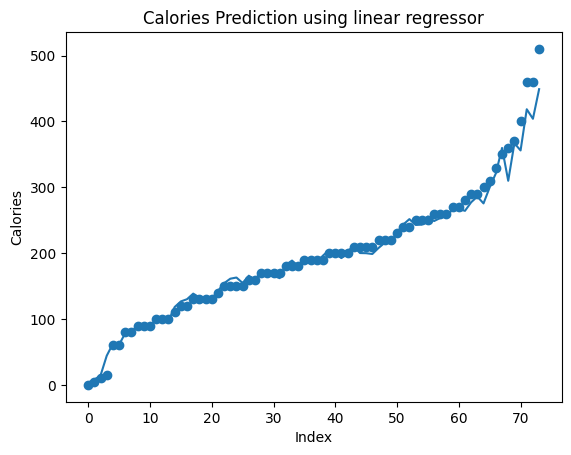

In [ ]:
from pyspark.ml.regression import LinearRegression
import numpy as np
lr = LinearRegression(featuresCol = 'features', labelCol='Calories', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train)

from pyspark.ml.evaluation import RegressionEvaluator
y_pred = lr_model.transform(test)
dt_predictions = lr_model.transform(test)
dt_predictions.select('prediction', 'Calories', 'features').show(5)

dt_errors = dt_predictions.select("Calories", "prediction").rdd.map(lambda x: x[0] - x[1]).map(lambda x: x * x).collect()
dt_rmse = np.sqrt(sum(dt_errors) / len(dt_errors))
print("Root Mean Squared Error (RMSE) on test data = %g" % dt_rmse)

evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(y_pred)
print("R2 on test data: " + str(r2))

import matplotlib.pyplot as plt
import numpy as np

x_ax = range(len(y_pred.select('Calories').collect()))

plt.scatter(x_ax, y_pred.select('Calories').collect())
plt.plot(x_ax, y_pred.select('prediction').collect())
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Calories Prediction using linear regressor')
plt.show()


**Decision tree regression model**

+-----------------+--------+--------------------+
|       prediction|Calories|            features|
+-----------------+--------+--------------------+
|              0.0|     0.0|     (57,[22],[1.0])|
|5.333333333333333|     5.0|(57,[26,47,52,53,...|
|5.333333333333333|    10.0|(57,[30,47,52,53,...|
|5.333333333333333|    15.0|(57,[38,47,52,53,...|
|61.42857142857143|    60.0|(57,[27,47,48,49,...|
+-----------------+--------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 15.0348
R2 on test data (using Decision Tree): 0.978777618966106


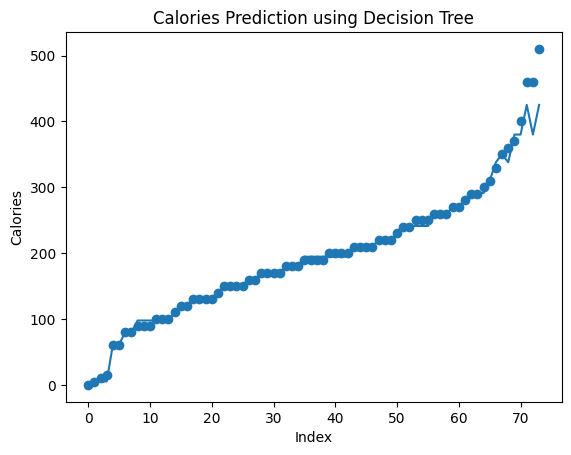

In [ ]:
import matplotlib.pyplot as plt
from pyspark.ml.regression import DecisionTreeRegressor
import numpy as np
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'Calories')
dt_model = dt.fit(train)
dt_predictions = dt_model.transform(test)
dt_predictions.select('prediction', 'Calories', 'features').show(5)

dt_errors = dt_predictions.select("Calories", "prediction").rdd.map(lambda x: x[0] - x[1]).map(lambda x: x * x).collect()
dt_rmse = np.sqrt(sum(dt_errors) / len(dt_errors))
print("Root Mean Squared Error (RMSE) on test data = %g" % dt_rmse)

evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="r2")
r2_dt = evaluator.evaluate(dt_predictions)
print("R2 on test data (using Decision Tree): " + str(r2_dt))

x_ax = range(len(dt_predictions.select('Calories').collect()))

plt.scatter(x_ax, dt_predictions.select('Calories').collect())
plt.plot(x_ax, dt_predictions.select('prediction').collect())
plt.xlabel('Index')
plt.ylabel('Calories')
plt.title('Calories Prediction using Decision Tree')
plt.show()


**GBT Regression Algorithm**

+--------+--------------------+--------------------+
|Calories|            features|          prediction|
+--------+--------------------+--------------------+
|     0.0|     (57,[22],[1.0])|0.005363587217080329|
|     5.0|(57,[26,47,52,53,...|   5.338696920550414|
|    10.0|(57,[30,47,52,53,...|   5.338696920550414|
|    15.0|(57,[38,47,52,53,...|   5.338696920550414|
|    60.0|(57,[27,47,48,49,...|   61.43393501578851|
+--------+--------------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 14.713
R2 on test data: 0.9796763243914409


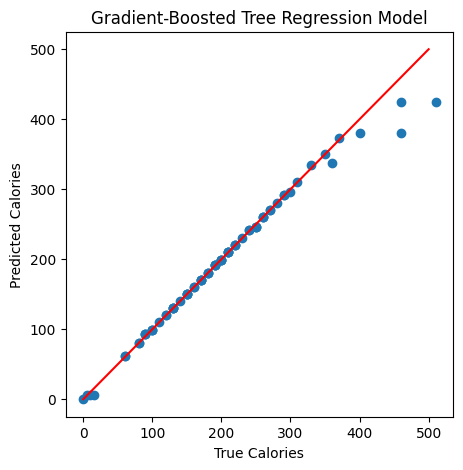

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'Calories', maxIter=10)
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(test)
gbt_predictions.show(5)

# Evaluate the model by computing the root mean squared error on the test data.
gbt_errors = gbt_predictions.select("Calories", "prediction").rdd.map(lambda x: x[0] - x[1]).map(lambda x: x * x).collect()
gbt_rmse = np.sqrt(sum(gbt_errors) / len(gbt_errors))
print("Root Mean Squared Error (RMSE) on test data = %g" % gbt_rmse)

# Evaluate prediction accuracy (R2)
gbt_evaluator = RegressionEvaluator(labelCol="Calories", predictionCol="prediction", metricName="r2")
r2 = gbt_evaluator.evaluate(gbt_predictions)
print("R2 on test data:", r2)

# Plot the evaluation metric and curve
plt.figure(figsize=(5, 5))
plt.scatter(test.select("Calories").collect(), gbt_predictions.select("prediction").collect())
plt.plot([0, 500], [0, 500], 'r-')
plt.xlabel("True Calories")
plt.ylabel("Predicted Calories")
plt.title("Gradient-Boosted Tree Regression Model")
plt.show()


**Data science and visualization**

In [ ]:
!pip install chardet

In [ ]:
import chardet

In [ ]:
with open('/content/sample_data/starbucks_drinkMenu_expanded.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('/content/sample_data/starbucks_drinkMenu_expanded.csv', encoding=encoding)
df1.nunique()

Beverage_category             9
Beverage                     33
Beverage_prep                13
Calories                     48
 Total Fat (g)               24
Trans Fat (g)                18
Saturated Fat (g)             4
 Sodium (mg)                  9
 Total Carbohydrates (g)     51
Cholesterol (mg)             75
 Dietary Fibre (g)            8
 Sugars (g)                  70
 Protein (g)                 26
Vitamin A (% DV)             11
Vitamin C (% DV)             10
 Calcium (% DV)              14
Iron (% DV)                  18
Caffeine (mg)                36
dtype: int64

In [ ]:
df1 = spark.read.csv('/content/sample_data/starbucks_drinkMenu_expanded.csv', header=True, inferSchema=True)

In [ ]:
df1 = df1.withColumn("Calories", df1["Calories"].cast("double"))
df1 = df1.withColumn(" Total Fat (g)", df1[" Total Fat (g)"].cast("double"))
df1 = df1.withColumn("Trans Fat (g) ", df1["Trans Fat (g) "].cast("double"))
df1 = df1.withColumn("Saturated Fat (g)", df1["Saturated Fat (g)"].cast("double"))
df1 = df1.withColumn(" Sodium (mg)", df1[" Sodium (mg)"].cast("double"))
df1 = df1.withColumn(" Total Carbohydrates (g) ", df1[" Total Carbohydrates (g) "].cast("double"))
df1 = df1.withColumn("Cholesterol (mg)", df1["Cholesterol (mg)"].cast("double"))
df1 = df1.withColumn(" Dietary Fibre (g)", df1[" Dietary Fibre (g)"].cast("double"))
df1 = df1.withColumn(" Sugars (g)", df1[" Sugars (g)"].cast("double"))
df1 = df1.withColumn(" Protein (g) ", df1[" Protein (g) "].cast("double"))

<ipython-input-28-ac36ae998932>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=' Protein (g) ', y='Calories', data=df1.toPandas(), palette='Set1')


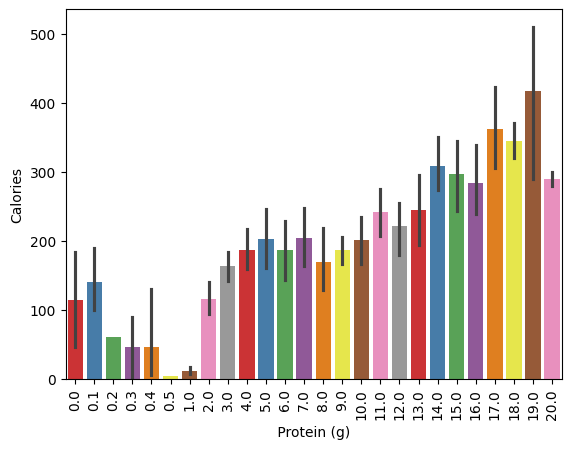

<ipython-input-28-ac36ae998932>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=' Sodium (mg)', y='Calories', data=df1.toPandas(), palette='Set2')


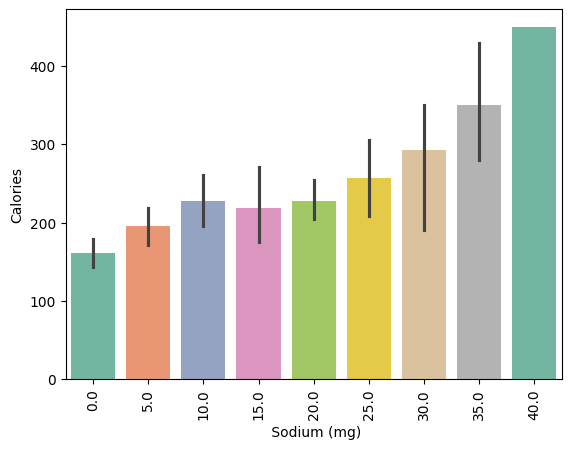

In [ ]:
sns.barplot(x=' Protien (mg)', y='Calories', data=df1.toPandas(), palette='Set1')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x=' Sodium (mg)', y='Calories', data=df1.toPandas(), palette='Set2')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import chardet

In [ ]:
with open('/content/sample_data/starbucks_drinkMenu_expanded.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df2 = pd.read_csv('/content/sample_data/starbucks_drinkMenu_expanded.csv', encoding=encoding)
df2.nunique()


Beverage_category             9
Beverage                     33
Beverage_prep                13
Calories                     48
 Total Fat (g)               24
Trans Fat (g)                18
Saturated Fat (g)             4
 Sodium (mg)                  9
 Total Carbohydrates (g)     51
Cholesterol (mg)             75
 Dietary Fibre (g)            8
 Sugars (g)                  70
 Protein (g)                 26
Vitamin A (% DV)             11
Vitamin C (% DV)             10
 Calcium (% DV)              14
Iron (% DV)                  18
Caffeine (mg)                36
dtype: int64

In [ ]:
correlation_matrix = df2.corr()

<ipython-input-32-15450d8dcb01>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df2.corr()


<ipython-input-33-2027b7162fd0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=' Protein (g) ', y=' Total Fat (g)', data=df_pd, palette='Set3')


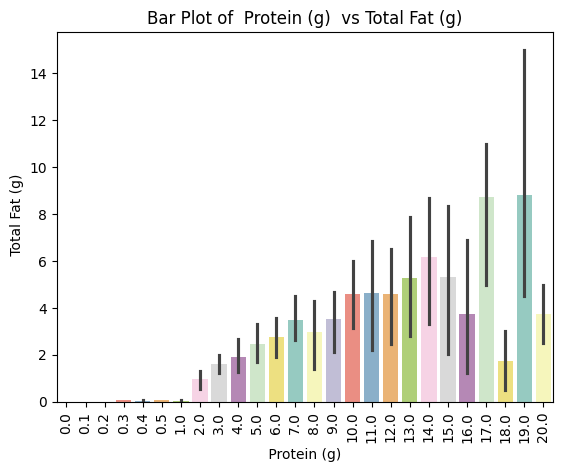

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df2 = df2.dropna(subset=[' Protein (g) ', ' Total Fat (g)'])
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df_pd = df1.collect()
df_pd = pd.DataFrame(df_pd, columns=df1.columns)
sns.barplot(x=' Protein (g) ', y=' Total Fat (g)', data=df_pd, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel(' Protein (g) ')
plt.ylabel(' Total Fat (g)')
plt.title('Bar Plot of  Protein (g)  vs Total Fat (g)')
plt.show()

**Bar graph**

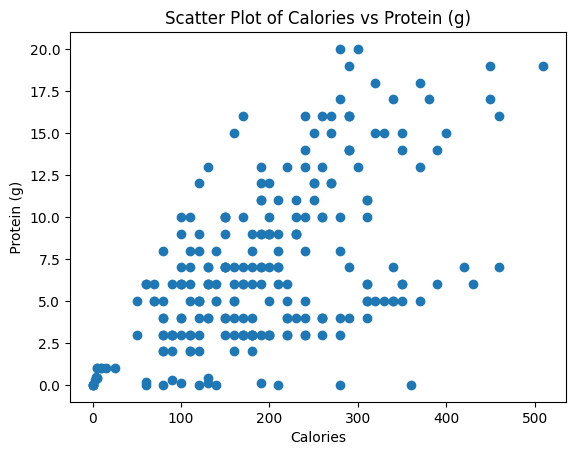

In [ ]:
import matplotlib.pyplot as plt
x = df1.select('Calories').collect()
y = df1.select(' Protein (g) ').collect()

plt.scatter(x, y)
plt.xlabel('Calories')
plt.ylabel(' Protein (g) ')
plt.title('Scatter Plot of Calories vs Protein (g)')
plt.show()


**Box plot**

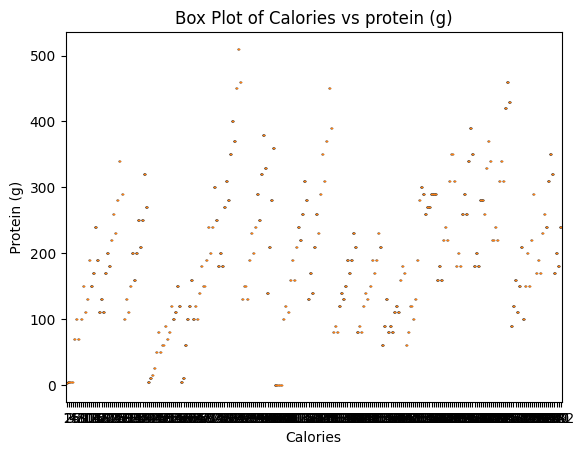

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df1.select('Calories').collect())
plt.xlabel('Calories')
plt.ylabel(' Protein (g) ')
plt.title('Box Plot of Calories vs protein (g)')
plt.show()


**Area plot**

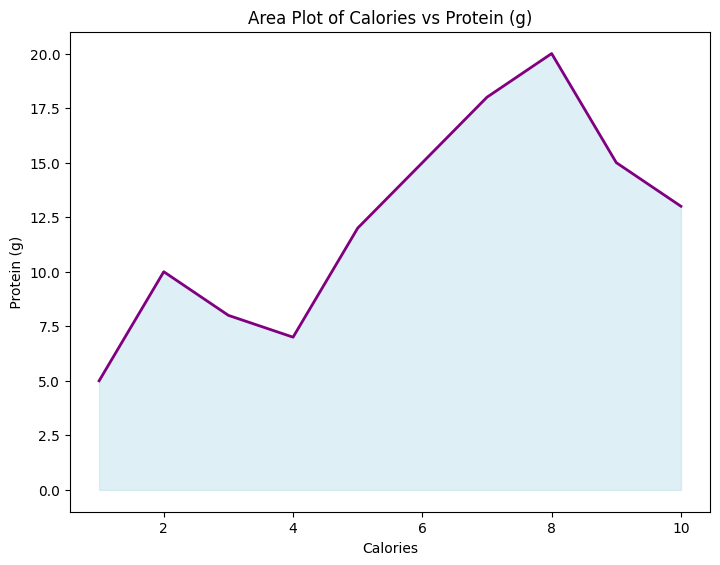

In [ ]:
import matplotlib.pyplot as plt

# Prepare some data
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [5, 10, 8, 7, 12, 15, 18, 20, 15, 13]

# Create the figure and axes
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

# Plot the data
ax.plot(x, y, color='purple', linewidth=2)

# Set the title and axis labels
ax.set_title("Area Plot of Calories vs Protein (g)")
ax.set_xlabel("Calories")
ax.set_ylabel(" Protein (g) ")

# Fill the area between the curve and the x-axis
ax.fill_between(x, y, color='lightblue', alpha=0.4)

# Show the plot
plt.show()


<ipython-input-39-fee3524cc626>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pd.corr(), annot=True, cmap='magma', fmt=".2f", linewidths=.5)


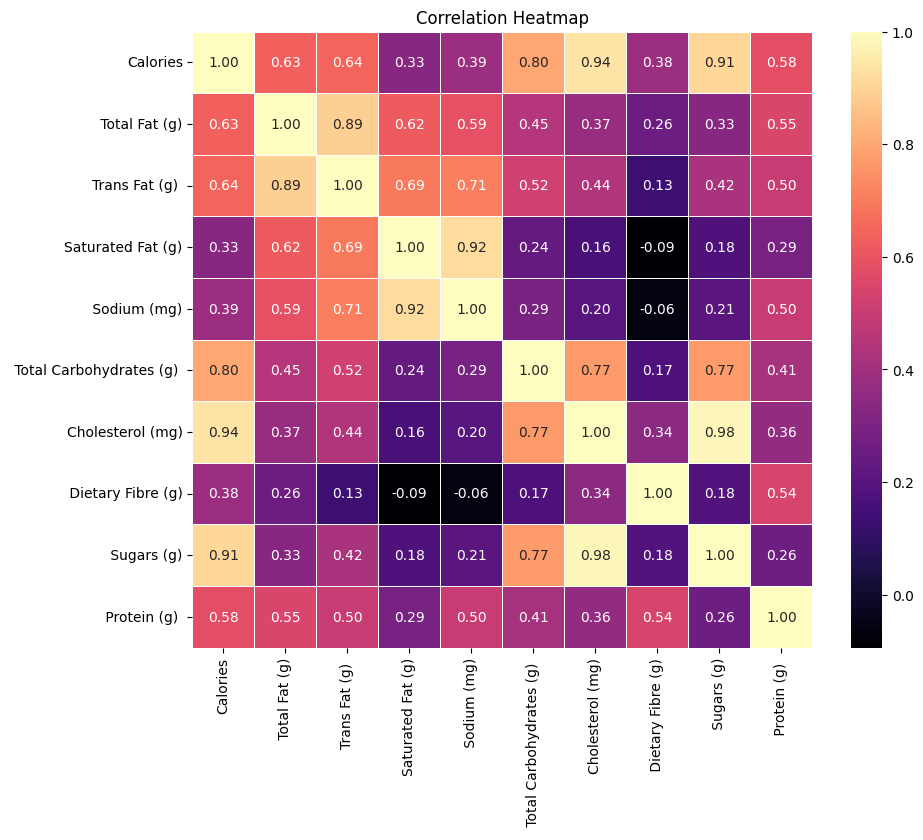

In [ ]:
df_pd = df1.toPandas()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_pd.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()